In [1]:
%matplotlib inline
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [3]:
MAR = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/MAR_MA_prep.csv", index_col=0)

In [4]:
MAR.Date = pd.to_datetime(MAR.Date, format="%Y-%m-%d")

In [5]:
MAR = MAR.set_index(MAR['Date'])

In [6]:
# MAR = MAR.drop("Date", axis=1)


In [7]:
MAR.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2019-08-15,128.8900,129.28,126.61,127.06,471452,2019-08-15
2019-08-14,130.3600,131.93,126.23,126.85,2103300,2019-08-14
2019-08-13,130.1900,133.23,130.01,132.41,1610200,2019-08-13
2019-08-12,131.2000,131.75,129.84,130.01,2305300,2019-08-12
2019-08-09,131.3385,132.98,129.73,132.46,2304400,2019-08-09


In [8]:
plt.style.use('ggplot')

In [9]:
MAR.index

DatetimeIndex(['2019-08-15', '2019-08-14', '2019-08-13', '2019-08-12',
               '2019-08-09', '2019-08-08', '2019-08-07', '2019-08-06',
               '2019-08-05', '2019-08-02',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=2421, freq=None)

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


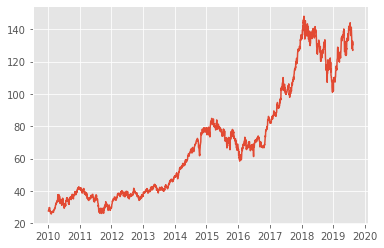

In [10]:
plt.plot(MAR.index,MAR.Close)


In [11]:
MAR = MAR[::-1]

In [12]:
#dictionary to store equity
equity_dict = dict()

In [13]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2):
            
            #print (position.is_long)
                        
            
            self.buy()
        else:
            pass
#         elif crossover(self.sma2, self.sma1):
            
#             self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [14]:
bt = Backtest(MAR, SmaCrossTrailing, cash=10000, commission=.005)

bt.run()

Start                     2010-01-04 00:00:00
End                       2019-08-15 00:00:00
Duration                   3510 days 00:00:00
Exposure [%]                           74.359
Equity Final [$]                        34888
Equity Peak [$]                       40838.1
Return [%]                             248.88
Buy & Hold Return [%]                 359.862
Max. Drawdown [%]                    -31.7589
Avg. Drawdown [%]                     -2.6555
Max. Drawdown Duration      655 days 00:00:00
Avg. Drawdown Duration       23 days 00:00:00
# Trades                                    3
Win Rate [%]                              100
Best Trade [%]                        80.4519
Worst Trade [%]                       13.0252
Avg. Trade [%]                        57.1587
Max. Trade Duration        1274 days 00:00:00
Avg. Trade Duration         870 days 00:00:00
Expectancy [%]                            NaN
SQN                                   2.04564
Sharpe Ratio                      

In [15]:
bt.plot()

In [16]:
df = pd.DataFrame.from_dict([equity_dict])

In [17]:
df = df.T

In [18]:
df.columns = ['Equity']

In [19]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/MAR_Moving_Average_Equity.csv")

In [20]:
df

,Equity
2010-10-19,10000.000000
2010-10-20,10000.000000
2010-10-21,10000.000000
2010-10-22,10000.000000
2010-10-25,10000.000000
2010-10-26,10000.000000
2010-10-27,10000.000000
2010-10-28,10000.000000
2010-10-29,10000.000000
2010-11-01,10000.000000


In [ ]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()